In [32]:
import scipy.io as io
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [33]:
data = io.loadmat("WLDataCW.mat")

In [34]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Jan 21 21:10:34 2022',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[[ 3.64516091e+00, -1.22507811e+00,  8.41415691e+00, ...,
          -1.16731644e+01,  2.65084229e+01,  4.00945067e-01],
         [ 1.57700694e+00,  2.68786597e+00,  2.37991428e+00, ...,
          -9.80385399e+00,  2.95700607e+01,  1.86778176e+00],
         [-2.88467383e+00,  3.47892046e+00, -3.33852053e+00, ...,
          -7.33824921e+00,  3.09278240e+01,  2.78261375e+00],
         ...,
         [ 6.32441854e+00,  7.38758564e+00, -5.30264425e+00, ...,
           2.92871971e+01, -2.80428171e-01, -4.32558784e+01],
         [-5.14494121e-01,  1.25400152e+01, -2.38987041e+00, ...,
           2.50036125e+01, -1.41281223e+00, -3.64643059e+01],
         [-3.36245584e+00,  1.25796471e+01,  1.27706754e+00, ...,
           2.42137814e+01, -1.03876221e+00, -3.15475597e+01]],
 
        [[ 1.40172338e+01,  6.67675018e+00,  1.04504976e+01, ...,
   

In [35]:
X = data['data']

In [36]:
X.shape

(62, 512, 360)

In [37]:
X = np.transpose(X)

In [38]:
X.shape

(360, 512, 62)

In [39]:
y = data['label']

In [40]:
y.shape

(1, 360)

In [41]:
y= np.transpose(y)

In [42]:
y.shape

(360, 1)

In [43]:
len(X)

360

In [44]:
len(y)

360

In [45]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [46]:
scaler=StandardScaler()
X_transform = scaler.fit_transform(X.reshape(-1,X.shape[-1])).reshape(X.shape)

In [47]:
X_transform.shape

(360, 512, 62)

In [48]:
X_transform

array([[[ 1.61168098e-01,  6.91580951e-01,  1.01101410e+00, ...,
          3.63649577e-01,  4.69384611e-01,  4.90507603e-01],
        [ 6.83511198e-02,  4.72435027e-01,  8.26347291e-01, ...,
          4.88638610e-01,  7.89436162e-01,  6.16748370e-02],
        [-1.31885305e-01, -3.81155685e-02,  3.85388657e-02, ...,
          2.59739589e-02,  8.33745658e-01, -4.44903523e-01],
        ...,
        [ 2.81410903e-01,  3.90077144e-01,  9.60153878e-01, ...,
          9.59591985e-01,  7.88507223e-01,  6.41800880e-01],
        [-2.55136658e-02,  2.00144455e-01,  5.48959196e-01, ...,
          1.62426090e+00,  9.51273441e-01,  1.24910390e+00],
        [-1.53327763e-01,  1.77725226e-01,  3.80270481e-01, ...,
          2.31522655e+00,  1.13026845e+00,  1.77145636e+00]],

       [[-5.74040674e-02,  3.29603553e-01,  6.72693014e-01, ...,
          2.55452776e+00,  1.37332726e+00,  1.62554085e+00],
        [ 1.18205525e-01,  5.08493066e-01,  1.20090163e+00, ...,
          2.21634078e+00,  1.61756957e

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test=train_test_split(X_transform,y, test_size=0.2,random_state=42)

In [50]:
  
    model= keras.Sequential()
    
    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(512,62))) #1
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPool1D(pool_size=2, strides=2))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #2
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPool1D(pool_size=2, strides=2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #3
    model.add(layers.LeakyReLU())
    model.add(layers.AveragePooling1D(pool_size=2, strides=2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #4
    model.add(layers.LeakyReLU())
    model.add(layers.AveragePooling1D(pool_size=2, strides=2))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #5
    model.add(layers.LeakyReLU())
    model.add(layers.GlobalAveragePooling1D())

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
    

In [51]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_35 (Conv1D)           (None, 510, 5)            935       
_________________________________________________________________
batch_normalization_7 (Batch (None, 510, 5)            20        
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 510, 5)            0         
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 255, 5)            0         
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 253, 5)            80        
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 253, 5)            0         
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 126, 5)           

In [52]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
kf = KFold(n_splits=5)

In [53]:
X_transform.shape

(360, 512, 62)

In [54]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [56]:
val_accuracy=[]
accuracy=[]
for train_index, test_index in kf.split(x_train, Y_train):
    X_train, X_test = x_train[train_index], x_train[test_index]
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
    val_accuracy.append(history.history['val_accuracy'][len(history.history['val_accuracy'])-1])
    print(val_accuracy)

Train on 230 samples, validate on 58 samples
Epoch 1/10
230/230 [==============================] - 6s 27ms/sample - loss: 0.6897 - accuracy: 0.4913 - val_loss: 0.6953 - val_accuracy: 0.5172
Epoch 2/10
230/230 [==============================] - 1s 2ms/sample - loss: 0.6895 - accuracy: 0.5130 - val_loss: 0.6906 - val_accuracy: 0.5172
Epoch 3/10
230/230 [==============================] - 0s 2ms/sample - loss: 0.6857 - accuracy: 0.5261 - val_loss: 0.6866 - val_accuracy: 0.5172
Epoch 4/10
230/230 [==============================] - 1s 2ms/sample - loss: 0.6810 - accuracy: 0.5174 - val_loss: 0.6829 - val_accuracy: 0.5172
Epoch 5/10
230/230 [==============================] - 1s 2ms/sample - loss: 0.6787 - accuracy: 0.5435 - val_loss: 0.6761 - val_accuracy: 0.5172
Epoch 6/10
230/230 [==============================] - 1s 3ms/sample - loss: 0.6722 - accuracy: 0.5348 - val_loss: 0.6694 - val_accuracy: 0.5172
Epoch 7/10
230/230 [==============================] - 1s 2ms/sample - loss: 0.6628 - accur

In [57]:
np.mean(val_accuracy)

0.82679975

In [58]:
  
    model= keras.Sequential()
    
    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(512,62))) #1
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPool1D(pool_size=2, strides=2))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #2
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPool1D(pool_size=2, strides=2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #3
    model.add(layers.LeakyReLU())
    model.add(layers.AveragePooling1D(pool_size=2, strides=2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #4
    model.add(layers.LeakyReLU())
    model.add(layers.AveragePooling1D(pool_size=2, strides=2))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #5
    model.add(layers.LeakyReLU())
    model.add(layers.GlobalAveragePooling1D())

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
    

In [59]:
history = model.fit(x_train, Y_train, epochs=50, batch_size=64, validation_data=(x_test, Y_test))

Train on 288 samples, validate on 72 samples
Epoch 1/50
288/288 [==============================] - 5s 18ms/sample - loss: 0.6945 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4861
Epoch 2/50
288/288 [==============================] - 1s 2ms/sample - loss: 0.6926 - accuracy: 0.5451 - val_loss: 0.6917 - val_accuracy: 0.5417
Epoch 3/50
288/288 [==============================] - 1s 2ms/sample - loss: 0.6910 - accuracy: 0.6042 - val_loss: 0.6903 - val_accuracy: 0.5972
Epoch 4/50
288/288 [==============================] - 1s 2ms/sample - loss: 0.6902 - accuracy: 0.5903 - val_loss: 0.6878 - val_accuracy: 0.5972
Epoch 5/50
288/288 [==============================] - 1s 2ms/sample - loss: 0.6868 - accuracy: 0.6701 - val_loss: 0.6844 - val_accuracy: 0.7361
Epoch 6/50
288/288 [==============================] - 1s 2ms/sample - loss: 0.6838 - accuracy: 0.6840 - val_loss: 0.6803 - val_accuracy: 0.7639
Epoch 7/50
288/288 [==============================] - 1s 2ms/sample - loss: 0.6779 - accur

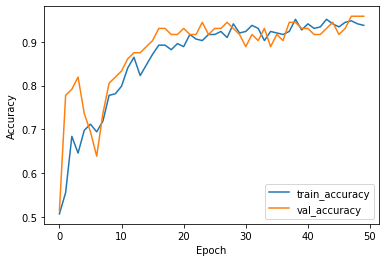

In [31]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('accuracy.pdf', dpi=1200)